In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df=pd.read_excel('/content/EastWestAirlines.xlsx',sheet_name='data')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
df.drop(['ID#'],axis=1,inplace=True)

In [5]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
standard=StandardScaler().fit_transform
df_norm=standard(df)

In [7]:
df_norm=pd.DataFrame(df_norm)
df_norm

,0,1,2,3,4,5,6,7,8,9,10
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [8]:
#k-means clustering
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, random_state=42)
  kmeans.fit(df_norm)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

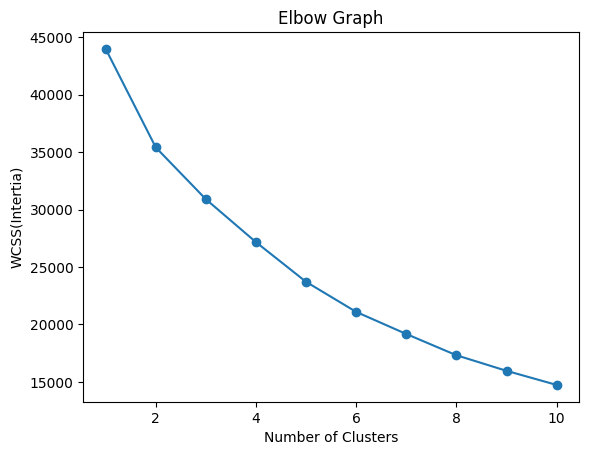

In [9]:
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS(Intertia)')
plt.show()

In [10]:
#build clusters using K=4
cluster4=KMeans(n_clusters=4,random_state=42).fit(df_norm)
cluster4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [11]:
cluster4.cluster_centers_

array([[-2.98478754e-01, -6.42142013e-02, -6.13747535e-01,
         3.28947498e-02, -6.07426678e-02, -5.17995326e-01,
        -4.91207604e-01, -1.86400083e-01, -1.98822948e-01,
        -2.07899699e-01, -3.48824498e-01],
       [ 1.19130578e+00,  1.02056447e+00,  9.95222056e-02,
         1.36680959e-01, -6.27665798e-02,  6.19234895e-01,
         1.55056071e+00,  3.42272158e+00,  3.67662420e+00,
         2.79402662e-01,  9.08902922e-01],
       [ 4.21685967e-01, -9.97266943e-03,  1.18816125e+00,
        -8.23662416e-02, -5.47626400e-02,  9.03299347e-01,
         7.41625184e-01, -9.44153225e-02, -1.04476981e-01,
         3.70515148e-01,  5.62946631e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01]])

In [12]:
cluster4.labels_
df['Cluster4_id']=cluster4.labels_
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster4_id
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [13]:
df.groupby('Cluster4_id').agg(['mean']).reset_index()

,Cluster4_id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,43563.850375,94.365969,1.215949,1.019345,1.000395,4646.641532,6.893012,198.932096,0.619029,3688.991709,0.201737
1,1,193640.947977,933.589595,2.196532,1.034682,1.000000,32098.098266,26.491329,5251.982659,15.317919,4695.491329,0.809249
2,2,116129.633020,136.613459,3.696401,1.002347,1.001565,38990.929577,18.726135,328.384194,0.978873,4886.052426,0.643192
3,3,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


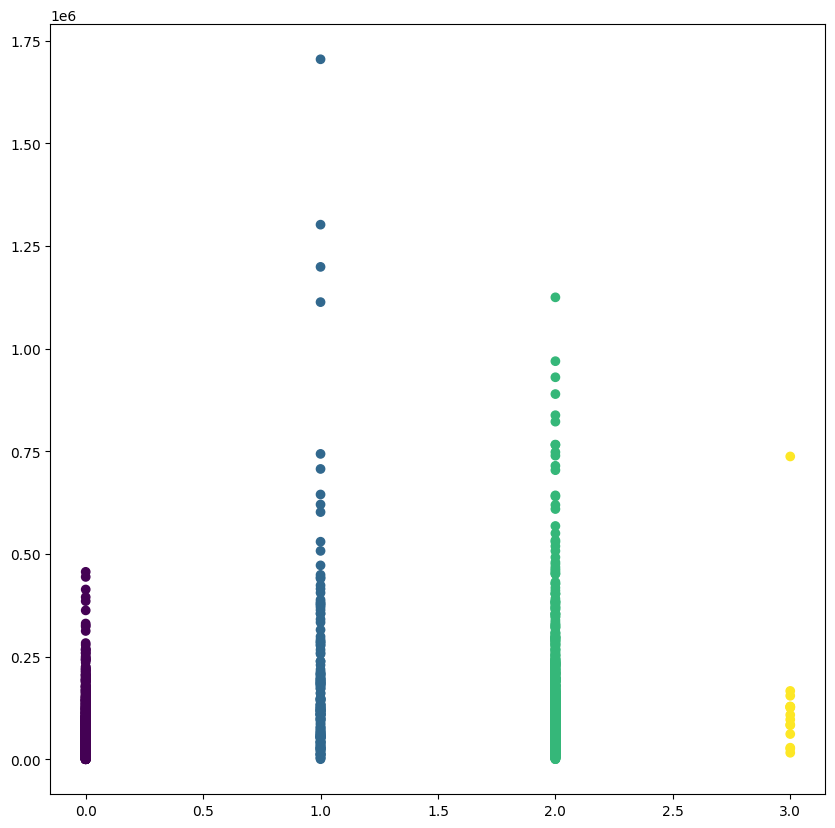

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(df['Cluster4_id'],df['Balance'],c=cluster4.labels_)

In [18]:
#make clusters using K=5
cluster5=KMeans(n_clusters=5,random_state=42).fit(df_norm)
cluster5

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [19]:
cluster5.cluster_centers_

array([[ 1.13984539,  1.05672065,  0.09776869, -0.09824189, -0.06276658,
         0.57151541,  1.51103346,  3.44127553,  3.6610428 ,  0.27107706,
         0.88975067],
       [-0.29035586, -0.05818754, -0.59651518, -0.09824189, -0.06074586,
        -0.51420592, -0.49040819, -0.18783605, -0.19980876, -0.20213465,
        -0.34539972],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.05178388],
       [ 0.43260424, -0.01954084,  1.22083157, -0.09824189, -0.05447771,
         0.94096329,  0.75568144, -0.09151819, -0.10212979,  0.37689814,
         0.58013031],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735]])

In [20]:
cluster5.labels_
df['Cluster5_id']=cluster5.labels_
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster4_id,Cluster5_id
0,28143,0,1,1,1,174,1,0,0,7000,0,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,1


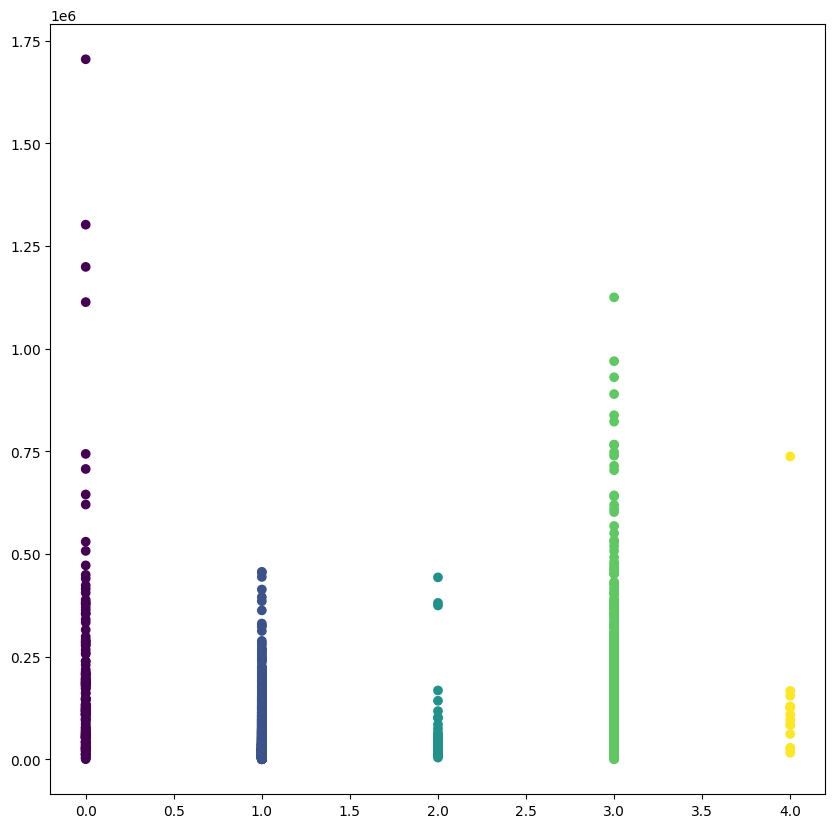

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(df['Cluster5_id'],df['Balance'],c=cluster5.labels_)

In [22]:
#Hierarchical clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [23]:
air=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [24]:
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [25]:
air.drop(['ID#'],axis=1,inplace=True)
air.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [26]:
air_norm=normalize(air)
air_norm

array([[9.70414393e-01, 0.00000000e+00, 3.44815547e-05, ...,
        0.00000000e+00, 2.41370883e-01, 0.00000000e+00],
       [9.40208573e-01, 0.00000000e+00, 4.88572320e-05, ...,
        0.00000000e+00, 3.40437193e-01, 0.00000000e+00],
       [9.81113099e-01, 0.00000000e+00, 2.37247449e-05, ...,
        0.00000000e+00, 1.66879855e-01, 0.00000000e+00],
       ...,
       [9.44947533e-01, 0.00000000e+00, 3.85184532e-05, ...,
        0.00000000e+00, 1.80009571e-02, 1.28394844e-05],
       [9.99591676e-01, 0.00000000e+00, 1.82078303e-05, ...,
        1.82078303e-05, 2.55091703e-02, 0.00000000e+00],
       [9.07271293e-01, 0.00000000e+00, 3.00819394e-04, ...,
        0.00000000e+00, 4.20545513e-01, 0.00000000e+00]])

In [27]:
air_norm=pd.DataFrame(air_norm)
air_norm

,0,1,2,3,4,5,6,7,8,9,10
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


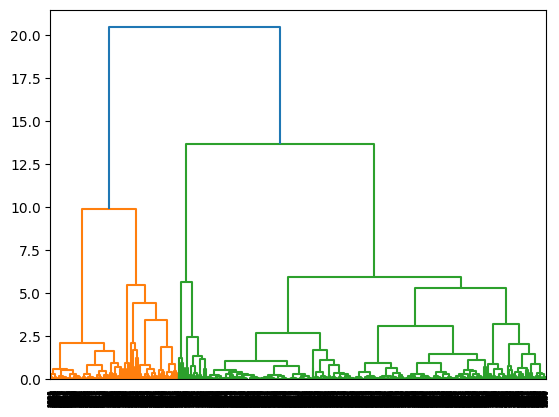

In [28]:
Dend=sch.dendrogram(sch.linkage(air_norm,method='ward'))

In [29]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

y=hc.fit_predict(air_norm)
y

air['Cluster_ID']=y
air

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_ID
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [30]:
air['Cluster_ID'].value_counts()

air.groupby('Cluster_ID').agg(['mean']).reset_index()

,Cluster_ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,52668.701550,103.471899,3.271318,1.030039,1.043605,37729.176357,17.566860,503.352713,1.510659,4141.220930,0.671512
1,1,87185.011687,170.754565,1.691381,1.009861,1.001461,10771.319211,10.123083,476.612126,1.419284,4046.725712,0.276844
2,2,5524.222707,8.755459,1.000000,1.000000,1.000000,584.532751,2.401747,66.982533,0.209607,4875.301310,0.131004


In [31]:
#DBSCAN Clustering

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [32]:
data=pd.read_excel('/content/EastWestAirlines.xlsx',sheet_name='data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [33]:
data.drop(['ID#'],axis=1,inplace=True)
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [34]:
array=data.values
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]])

In [35]:
X=StandardScaler().fit_transform(array)
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [36]:
dbscan=DBSCAN(eps=3,min_samples=4)
dbscan.fit_predict(X)

dbscan.labels_

cl=pd.DataFrame(dbscan.labels_,columns=['Cluster'])
cl

,Cluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


CRIME DATA

In [38]:
#KMeans Clustering

crime=pd.read_csv('/content/crime_data.csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [39]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [40]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True)
crime.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [41]:
crime_norm=StandardScaler().fit_transform(crime)
crime_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [42]:
crime_norm=pd.DataFrame(crime_norm)
crime_norm.head()

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [43]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=40)
  kmeans.fit(crime_norm)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

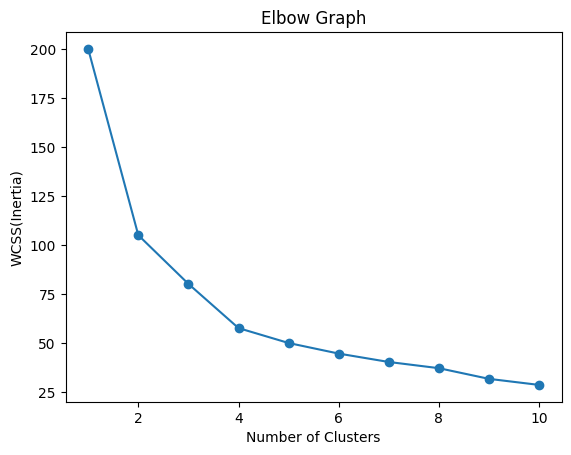

In [44]:
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS(Inertia)')
plt.show()

In [45]:
#make clusters using k=4
k_cluster=KMeans(n_clusters=4,init='k-means++',random_state=40).fit(crime_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [46]:
k_cluster.labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [47]:
k_cluster.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669]])

In [50]:
crime['K-Cluster_ID']=k_cluster.labels_
crime

,Murder,Assault,UrbanPop,Rape,K-Cluster_ID
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,3
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,3


In [51]:
crime['K-Cluster_ID'].value_counts()

0    16
1    13
2    13
3     8
Name: K-Cluster_ID, dtype: int64

In [52]:
crime.groupby('K-Cluster_ID').agg(['mean']).reset_index()

,K-Cluster_ID,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,10.815385,257.384615,76.000000,33.192308
2,2,3.600000,78.538462,52.076923,12.176923
3,3,13.937500,243.625000,53.750000,21.412500


In [53]:
#CRIME Data-Hierarchical Clustering
crimedf=pd.read_csv('crime_data.csv')
crimedf.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [54]:
crimedf.drop(['Unnamed: 0'],axis=1,inplace=True)
crimedf.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [55]:
from sklearn.preprocessing import normalize
crimedf_norm=normalize(crimedf)
crimedf_norm

array([[0.05403139, 0.96601575, 0.23741065, 0.08677769],
       [0.0368722 , 0.96973889, 0.17698657, 0.1640813 ],
       [0.02643862, 0.95962381, 0.26112213, 0.10118482],
       [0.04452761, 0.9613916 , 0.25299779, 0.09866914],
       [0.03065655, 0.94013412, 0.30997176, 0.13829509],
       [0.03559422, 0.91914181, 0.35143658, 0.17436661],
       [0.02448606, 0.81620208, 0.57134146, 0.08236221],
       [0.02367351, 0.95496538, 0.28889709, 0.06339686],
       [0.04447826, 0.96754652, 0.23105589, 0.09213353],
       [0.07853358, 0.95233247, 0.27080544, 0.11644634],
       [0.05454612, 0.47341917, 0.85421286, 0.20789277],
       [0.01964047, 0.90648301, 0.40791735, 0.10726716],
       [0.03942842, 0.94400732, 0.31466911, 0.09098866],
       [0.05444736, 0.85452107, 0.49153867, 0.1588048 ],
       [0.02725092, 0.69365977, 0.70604655, 0.13997063],
       [0.04479483, 0.85856764, 0.49274317, 0.1343845 ],
       [0.07934635, 0.89162397, 0.42536189, 0.13333459],
       [0.0594568 , 0.96134697,

In [56]:
crimedf_norm=pd.DataFrame(crimedf_norm)

In [57]:
crimedf_norm.head()

,0,1,2,3
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295


In [58]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

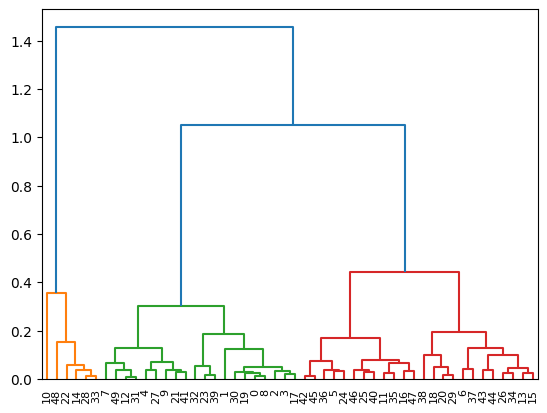

In [59]:
dend_crime=sch.dendrogram(sch.linkage(crimedf_norm,method='ward'))

In [60]:
hc_crime=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_crime=hc_crime.fit_predict(crimedf_norm)
y_crime

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 2])

In [61]:
crimedf['Cluster_ID']=y_crime
crimedf

,Murder,Assault,UrbanPop,Rape,Cluster_ID
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,2
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,2


In [62]:
crimedf['Cluster_ID'].value_counts()
crimedf.groupby('Cluster_ID').agg(['mean']).reset_index()

,Cluster_ID,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.770833,129.083333,65.958333,18.575000
1,1,2.616667,54.833333,62.000000,12.333333
2,2,11.760000,255.550000,66.100000,27.090000


In [64]:
#CRIME Data-DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [65]:
crimedata=pd.read_csv('crime_data.csv')
crimedata.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [66]:
crimedata.drop(['Unnamed: 0'],axis=1,inplace=True)
crimedata.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [67]:
crimedata_norm=StandardScaler().fit_transform(crimedata)
crimedata_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [69]:
crimedata_norm=pd.DataFrame(crimedata_norm)
dbscan_crime=DBSCAN(eps=1,min_samples=4)
dbscan_crime.fit_predict(crimedata_norm)

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [70]:
dbscan_crime.labels_ 

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [71]:
crimedata['Cluster']=dbscan_crime.labels_
crimedata

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [72]:
crimedata.groupby('Cluster').agg(['mean']).reset_index()

,Cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


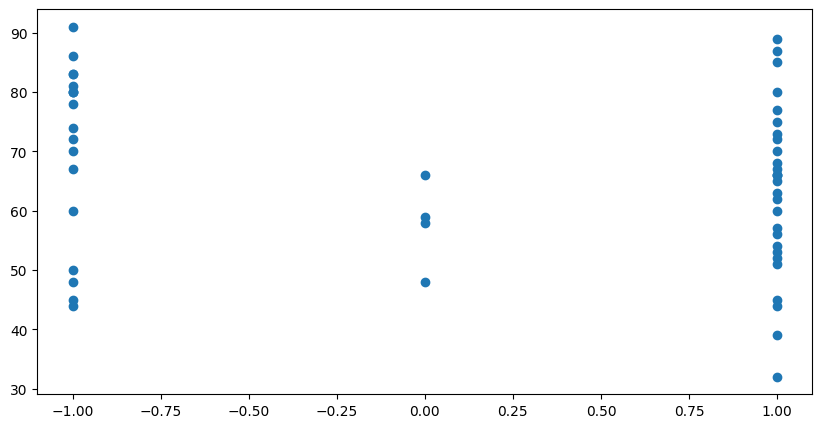

In [75]:
plt.figure(figsize=(10,5))
plt.scatter(crimedata['Cluster'],crimedata['UrbanPop'])